### 30. juni

Lagde et nytt script for gradvis læring etter å ha funnet ut at jeg kan bruke target_transform i Pytorch som gjorde ting lettere og fikk plot som forventet!! Koden for dette er vist under.

Hadde et møte med Anders hvor jeg fikk en ny oppgave å jobbe med. Skal prøve å plotte vektendring mot antall vekter. Startet på et script for å se på den nye oppgaven. Dette vises i neste notebook: 01-04_07_23.ipynb.

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
# Hyperparameters
input_dim = 28**2  # MNIST images are 28x28 pixels
hidden_dim1 = 256  # Number of nodes in the first hidden layer
learning_rate = 0.01
output_dim = 10  # Initial output classes 

# Define the training parameters
batch_size = 64
num_epochs = 30

# Set random seed for reproducibility
torch.manual_seed(43)

In [16]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim1)
        self.layer2 = nn.Linear(hidden_dim1, output_dim)
        self.R = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.R(self.layer1(x))
        x = self.layer2(x)
        return x

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Initialize lists to track weight differences, accuracies, and losses
weight_diffs = []
accuracies = []
losses = []

# Train the neural network with the specified training scheme
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    if epoch < 10:
        train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True, target_transform=lambda y: (y % 4))
    elif epoch < 20:
        train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True, target_transform=lambda y: (y % 5))
    else:
        train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True) # target_transform=lambda y: (y % 6)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    total_loss = 0.0
    correct = 0

    weight_diff = 0.0

    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

        if epoch > 0:
            weight_diff += torch.norm(model.layer1.weight.data - prev_weights)

        prev_weights = model.layer1.weight.data.clone()

    accuracy = 100.0 * correct / len(train_loader.dataset)
    losses.append(total_loss / len(train_loader))
    accuracies.append(accuracy)
    weight_diffs.append(weight_diff.item() if isinstance(weight_diff, torch.Tensor) else weight_diff)

    print(f'Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.2f}%, Loss: {total_loss/len(train_loader):.4f}, Weight Difference: {weight_diff:.4f}')


Epoch [1/30], Accuracy: 77.98%, Loss: 0.6094, Weight Difference: 0.0000
Epoch [2/30], Accuracy: 86.81%, Loss: 0.3868, Weight Difference: 16.3962
Epoch [3/30], Accuracy: 90.33%, Loss: 0.2982, Weight Difference: 15.9062
Epoch [4/30], Accuracy: 92.23%, Loss: 0.2430, Weight Difference: 15.1579
Epoch [5/30], Accuracy: 93.42%, Loss: 0.2084, Weight Difference: 14.7025
Epoch [6/30], Accuracy: 94.21%, Loss: 0.1847, Weight Difference: 14.5098
Epoch [7/30], Accuracy: 94.80%, Loss: 0.1667, Weight Difference: 14.4317
Epoch [8/30], Accuracy: 95.22%, Loss: 0.1530, Weight Difference: 14.3367
Epoch [9/30], Accuracy: 95.54%, Loss: 0.1415, Weight Difference: 13.9490
Epoch [10/30], Accuracy: 95.84%, Loss: 0.1323, Weight Difference: 14.0742
Epoch [11/30], Accuracy: 89.10%, Loss: 0.3741, Weight Difference: 19.6964
Epoch [12/30], Accuracy: 93.70%, Loss: 0.2109, Weight Difference: 15.0689
Epoch [13/30], Accuracy: 94.79%, Loss: 0.1761, Weight Difference: 14.2333
Epoch [14/30], Accuracy: 95.37%, Loss: 0.1557, W

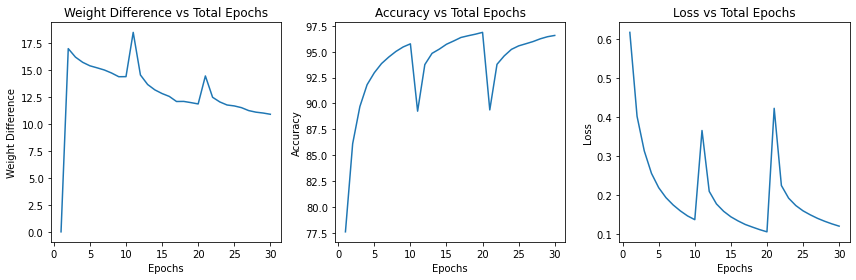

[0.0,
 16.996030807495117,
 16.207366943359375,
 15.726431846618652,
 15.403038024902344,
 15.214411735534668,
 15.014066696166992,
 14.73436164855957,
 14.390353202819824,
 14.397309303283691,
 18.504777908325195,
 14.552977561950684,
 13.668302536010742,
 13.169251441955566,
 12.829048156738281,
 12.562945365905762,
 12.092185974121094,
 12.09934139251709,
 11.98763656616211,
 11.865278244018555,
 14.461857795715332,
 12.481751441955566,
 12.050679206848145,
 11.768061637878418,
 11.680922508239746,
 11.521085739135742,
 11.248330116271973,
 11.102828025817871,
 11.021427154541016,
 10.907164573669434]

In [ ]:
# Plot the weight difference, accuracy, and loss over epochs
epochs = list(range(1, num_epochs+1))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(epochs, weight_diffs)
plt.xlabel('Epochs')
plt.ylabel('Weight Difference')
plt.title('Weight Difference vs Total Epochs')

plt.subplot(1, 3, 2)
plt.plot(epochs, accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Total Epochs')

plt.subplot(1, 3, 3)
plt.plot(epochs, losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Total Epochs')

plt.tight_layout()
plt.show()